In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/refs/heads/main/Churn_Modelling.csv')

# Display the first 5 rows of the DataFrame
display(df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Display information about the DataFrame, including data types and non-null values
display(df.info())

# Display descriptive statistics for numerical columns
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


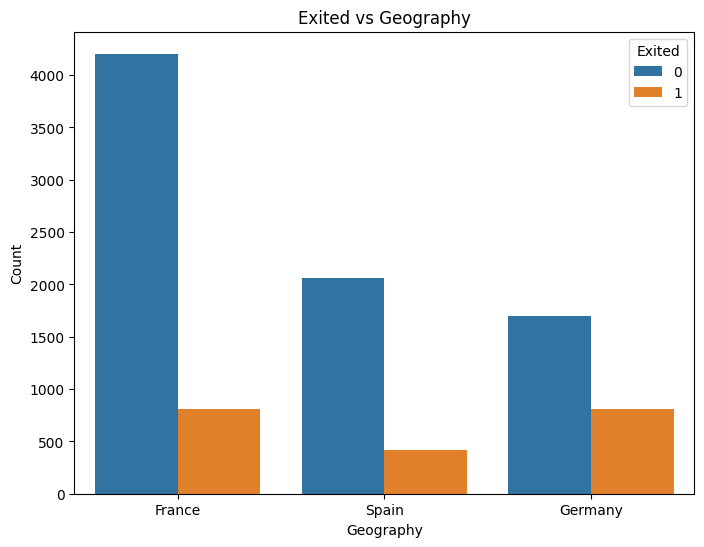

In [4]:
# Create a bar chart between Exited and Geography
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Exited vs Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

### Histograms of numerical columns

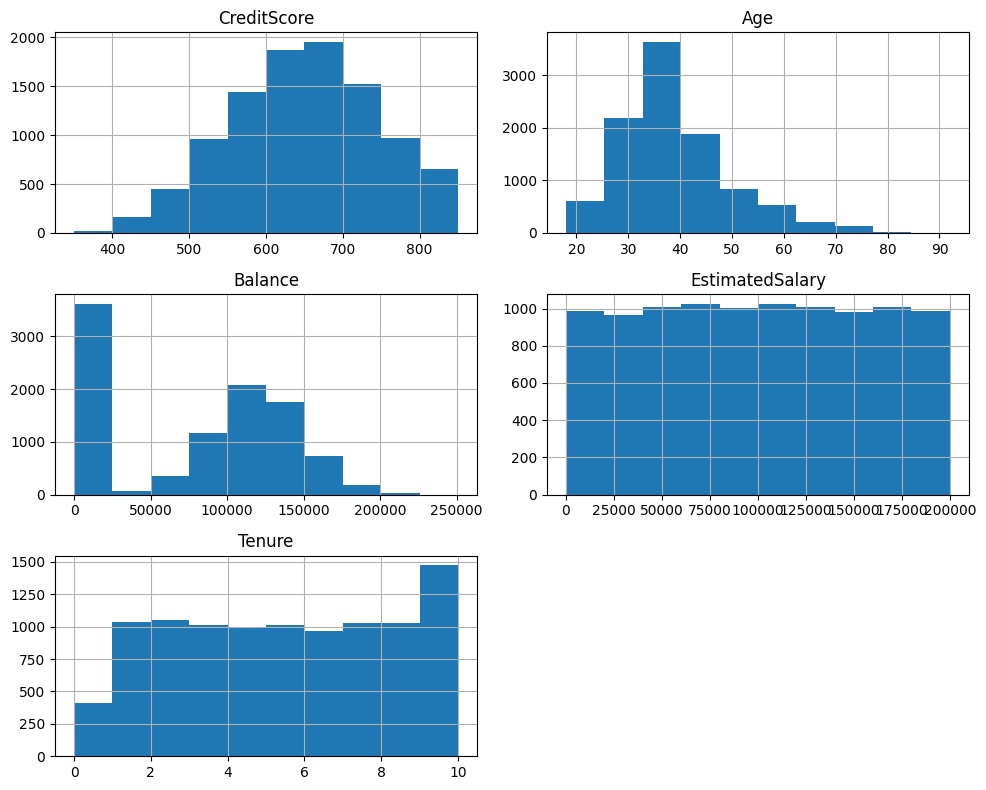

In [5]:
numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']
df[numerical_cols].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

### Bar charts of categorical columns

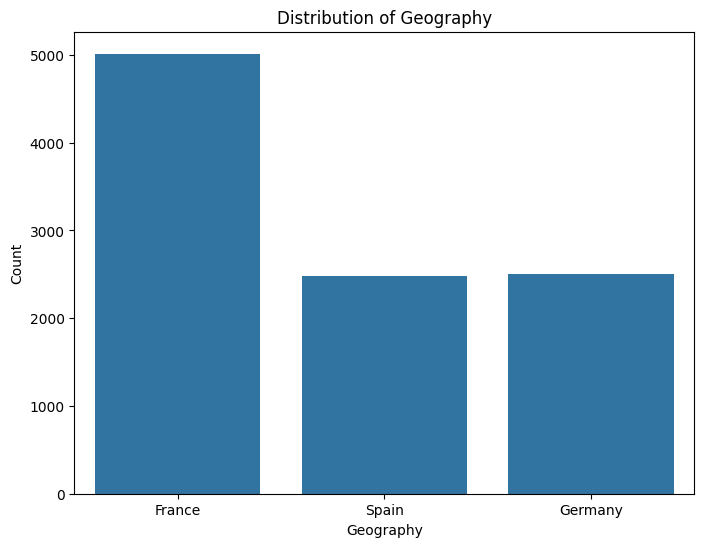

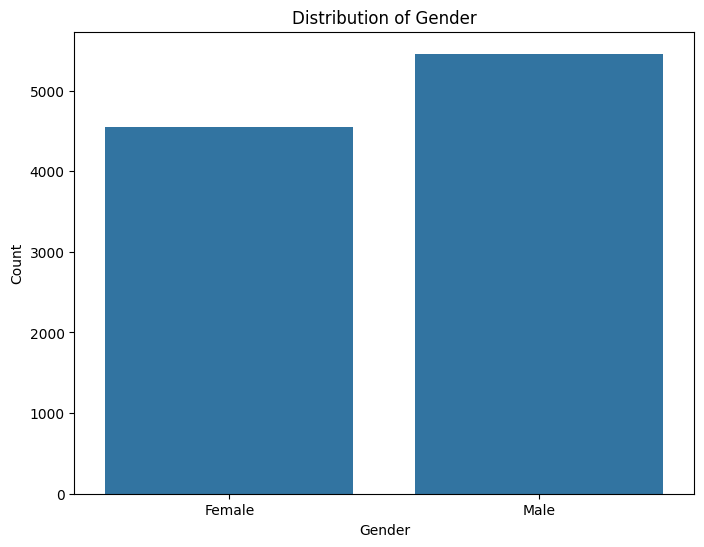

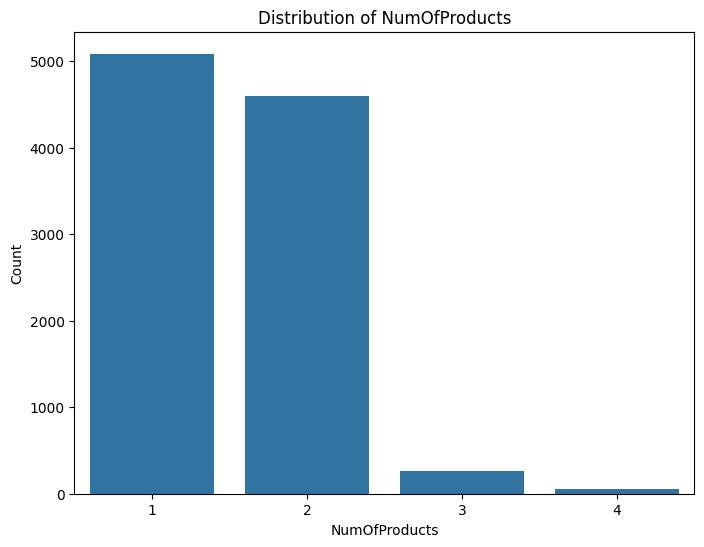

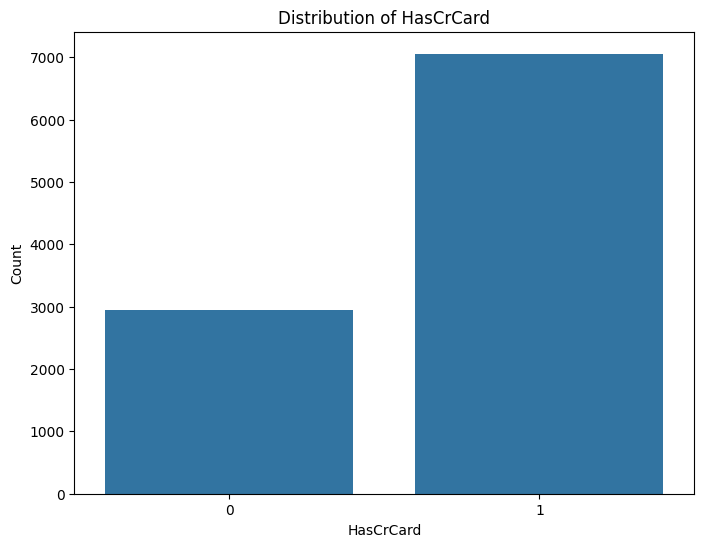

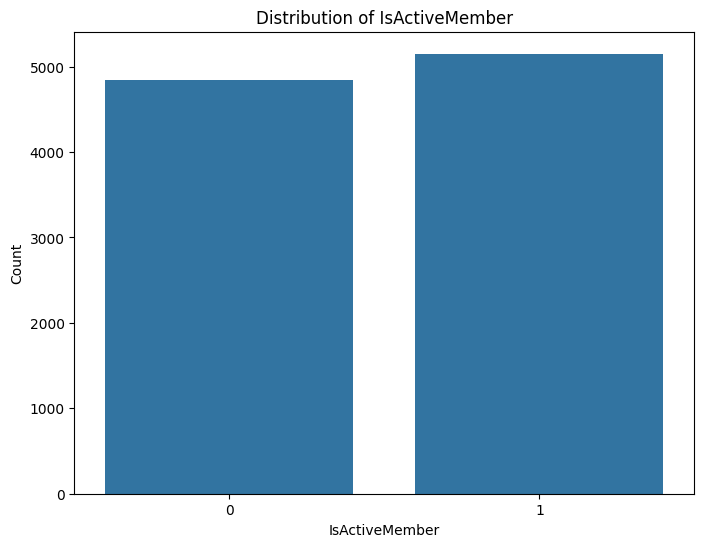

In [6]:
categorical_cols = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

### Box plots of numerical columns vs Exited

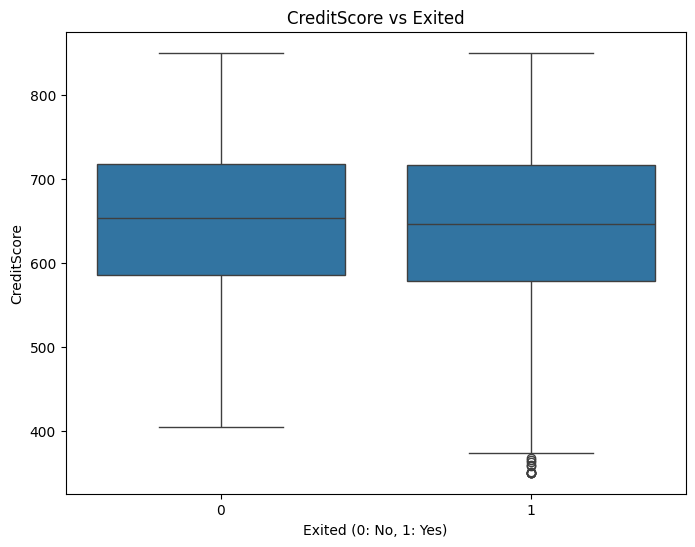

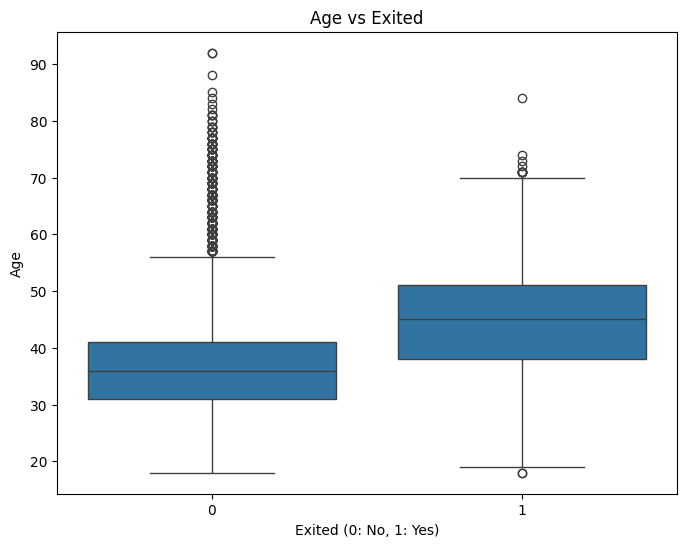

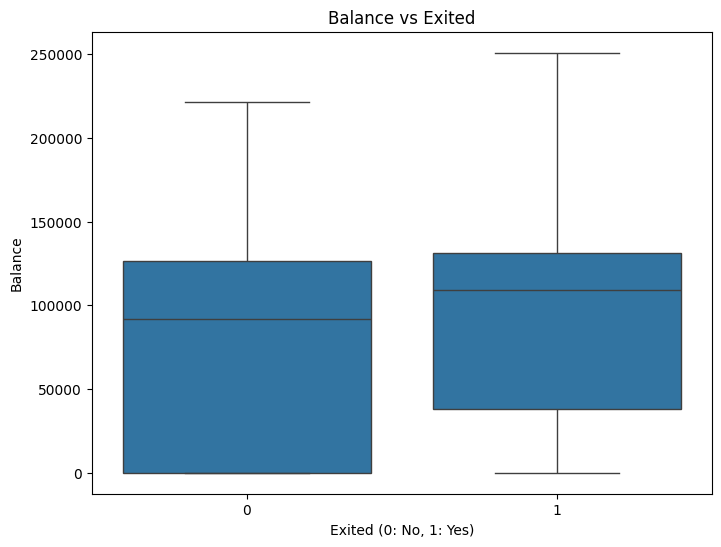

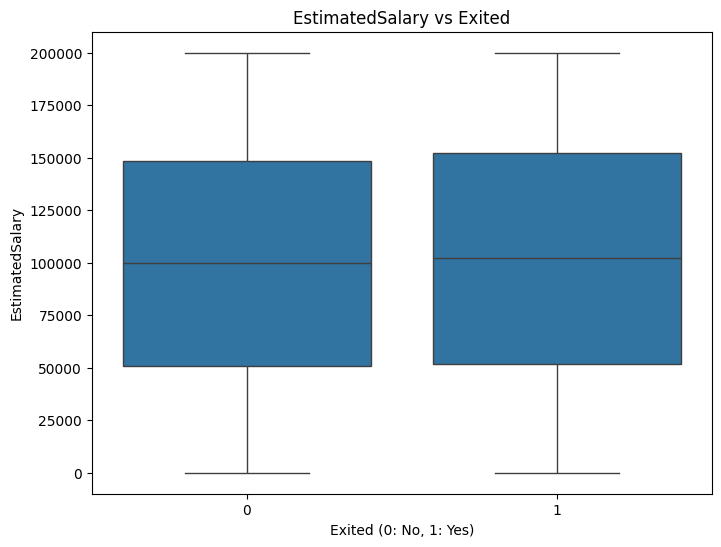

In [7]:
numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f'{col} vs Exited')
    plt.xlabel('Exited (0: No, 1: Yes)')
    plt.ylabel(col)
    plt.show()

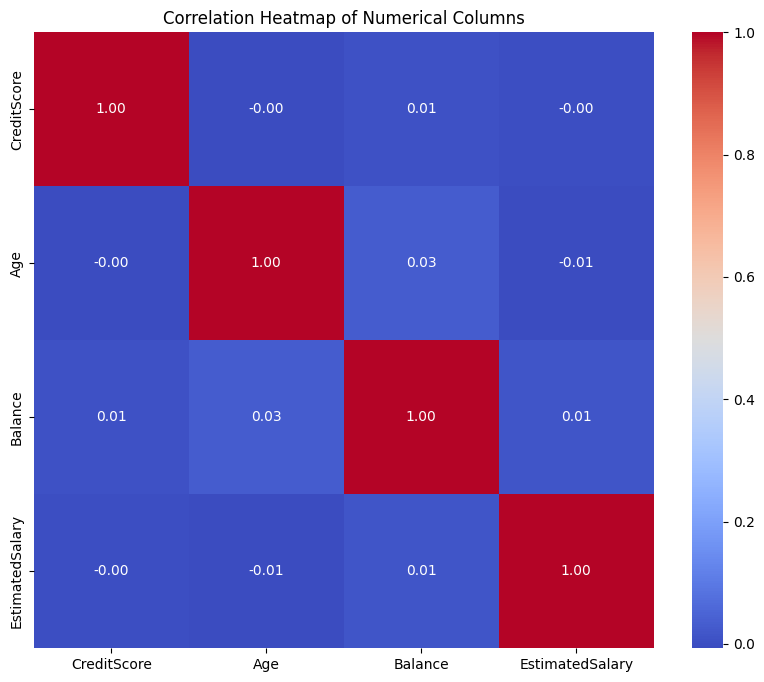

In [8]:
# Calculate the correlation matrix for numerical columns
corr_matrix = df[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# Task
Create a machine learning model to predict customer churn using the dataset "Churn_Modeling.csv".

## Data preprocessing

### Subtask:
Handle categorical features, scale numerical features, and split the data into training and testing sets.


**Reasoning**:
Identify categorical and numerical columns, apply one-hot encoding to categorical features, and scale numerical features. Then, combine the processed features into a single DataFrame, define features (X) and target variable (y), and split the data into training and testing sets.



In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Identify categorical and numerical columns
categorical_cols = ['Geography', 'Gender']
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Create a column transformer to apply one-hot encoding to categorical features and scaling to numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough') # Keep other columns (like RowNumber, CustomerId, Surname)

# Apply the transformations
X = df.drop('Exited', axis=1)
y = df['Exited']

# Create a pipeline that first preprocesses the data and then could be used for modeling
# We are only doing the preprocessing step here
X_processed = preprocessor.fit_transform(X)

# Get the names of the one-hot encoded columns
onehot_column_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine the numerical and one-hot encoded categorical column names
processed_column_names = numerical_cols + list(onehot_column_names)

# Create a DataFrame with the processed features
X_processed_df = pd.DataFrame(X_processed, columns=processed_column_names)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

ValueError: Shape of passed values is (10000, 16), indices imply (10000, 13)

**Reasoning**:
The error indicates a mismatch between the shape of the processed data and the provided column names. This is likely because the `remainder='passthrough'` in the `ColumnTransformer` is passing through the original columns ('RowNumber', 'CustomerId', 'Surname') which are not included in the `processed_column_names`. We should drop these columns before applying the ColumnTransformer.



In [10]:
# Identify categorical and numerical columns
categorical_cols = ['Geography', 'Gender']
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Create a column transformer to apply one-hot encoding to categorical features and scaling to numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='drop') # Drop other columns

# Apply the transformations
X = df.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)
y = df['Exited']

# Create a pipeline that first preprocesses the data and then could be used for modeling
# We are only doing the preprocessing step here
X_processed = preprocessor.fit_transform(X)

# Get the names of the one-hot encoded columns
onehot_column_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine the numerical and one-hot encoded categorical column names
processed_column_names = numerical_cols + list(onehot_column_names)

# Create a DataFrame with the processed features
X_processed_df = pd.DataFrame(X_processed, columns=processed_column_names)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9254,0.367013,-0.660018,0.341352,-1.225848,0.807737,0.646092,0.970243,1.373784,1.0,0.0,0.0,0.0,1.0
1561,-0.191713,0.293517,-0.350204,0.691389,0.807737,0.646092,0.970243,1.667407,0.0,1.0,0.0,0.0,1.0
1670,-0.947028,-1.422847,-0.695982,0.613102,-0.911583,0.646092,-1.030670,-0.246910,0.0,0.0,1.0,0.0,1.0
6087,-0.926334,-1.136786,1.378686,0.948021,-0.911583,0.646092,-1.030670,0.921446,1.0,0.0,0.0,1.0,0.0
6669,-1.381593,1.628468,1.378686,1.052363,-0.911583,-1.547768,-1.030670,-1.053812,1.0,0.0,0.0,0.0,1.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6252,-0.564197,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.030670,-1.013811,0.0,1.0,0.0,0.0,1.0
4684,-0.284834,0.388871,-1.387538,-1.225848,0.807737,0.646092,0.970243,0.804921,1.0,0.0,0.0,0.0,1.0
1731,-0.512463,0.484225,-0.350204,-1.225848,0.807737,0.646092,-1.030670,-0.722147,0.0,0.0,1.0,1.0,0.0
4742,-1.495407,1.914528,1.032908,0.683816,0.807737,0.646092,0.970243,1.227481,0.0,1.0,0.0,0.0,1.0
4521,-0.936681,-1.136786,0.687130,0.777477,-0.911583,0.646092,0.970243,0.253524,0.0,0.0,1.0,1.0,0.0


,Exited
9254,0
1561,0
1670,1
6087,1
6669,1


,Exited
6252,0
4684,0
1731,0
4742,0
4521,0


## Model selection

### Subtask:
Choose a suitable machine learning model for binary classification (predicting churn).


## Model training

### Subtask:
Train the selected models (Logistic Regression and LightGBM) on the training data.


**Reasoning**:
Train Logistic Regression and LightGBM models on the training data.



In [11]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

# Instantiate and train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Instantiate and train LightGBM model
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267


LGBMClassifier(random_state=42)

## Model evaluation

### Subtask:
Evaluate the performance of the trained Logistic Regression and LightGBM models using appropriate metrics.


**Reasoning**:
Import the necessary metrics and make predictions using both models, then calculate and print the performance metrics for each model.



In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)
y_pred_lgbm = lgbm_model.predict(X_test)

# Calculate performance metrics for Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
auc_logistic = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Calculate performance metrics for LightGBM
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)
auc_lgbm = roc_auc_score(y_test, lgbm_model.predict_proba(X_test)[:, 1])

# Print the metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_logistic:.4f}")
print(f"Precision: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"F1 Score: {f1_logistic:.4f}")
print(f"AUC: {auc_logistic:.4f}")
print("\nLightGBM Metrics:")
print(f"Accuracy: {accuracy_lgbm:.4f}")
print(f"Precision: {precision_lgbm:.4f}")
print(f"Recall: {recall_lgbm:.4f}")
print(f"F1 Score: {f1_lgbm:.4f}")
print(f"AUC: {auc_lgbm:.4f}")

Logistic Regression Metrics:
Accuracy: 0.8110
Precision: 0.5524
Recall: 0.2010
F1 Score: 0.2948
AUC: 0.7789

LightGBM Metrics:
Accuracy: 0.8680
Precision: 0.7452
Recall: 0.4987
F1 Score: 0.5976
AUC: 0.8656


## Hyperparameter tuning (optional)

### Subtask:
Improve model performance by tuning hyperparameters.


**Reasoning**:
Import GridSearchCV and define the parameter grid for LGBMClassifier, then instantiate GridSearchCV and fit it to the training data.



In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for LGBMClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid,
                           scoring='f1', cv=3, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Info] Number of positive: 1096, number of negative: 4237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 5333, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205513 -> initscore=-1.352188
[LightGBM] [Info] Start training from score -1.352188
[LightGBM] [Info] Number of positive: 1096, number of negative: 4237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set:

## Prediction

### Subtask:
Use the trained and potentially tuned LightGBM model to make predictions on the test data.


**Reasoning**:
Use the best estimator from the grid search to make predictions on the test set.



In [14]:
# Access the best performing model
best_lgbm_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred_tuned_lgbm = best_lgbm_model.predict(X_test)

## Model evaluation

### Subtask:
Evaluate the performance of the tuned LightGBM model using appropriate metrics and compare it to the initial LightGBM model.


**Reasoning**:
Calculate and print the performance metrics for the tuned LightGBM model and compare them to the initial model.



In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate performance metrics for the tuned LightGBM model
accuracy_tuned_lgbm = accuracy_score(y_test, y_pred_tuned_lgbm)
precision_tuned_lgbm = precision_score(y_test, y_pred_tuned_lgbm)
recall_tuned_lgbm = recall_score(y_test, y_pred_tuned_lgbm)
f1_tuned_lgbm = f1_score(y_test, y_pred_tuned_lgbm)
auc_tuned_lgbm = roc_auc_score(y_test, best_lgbm_model.predict_proba(X_test)[:, 1])

# Print the metrics for the tuned LightGBM model
print("Tuned LightGBM Metrics:")
print(f"Accuracy: {accuracy_tuned_lgbm:.4f}")
print(f"Precision: {precision_tuned_lgbm:.4f}")
print(f"Recall: {recall_tuned_lgbm:.4f}")
print(f"F1 Score: {f1_tuned_lgbm:.4f}")
print(f"AUC: {auc_tuned_lgbm:.4f}")

# Compare with initial LightGBM metrics
print("\nComparison with Initial LightGBM Metrics:")
print(f"Initial LightGBM Accuracy: {accuracy_lgbm:.4f}, Tuned LightGBM Accuracy: {accuracy_tuned_lgbm:.4f}")
print(f"Initial LightGBM Precision: {precision_lgbm:.4f}, Tuned LightGBM Precision: {precision_tuned_lgbm:.4f}")
print(f"Initial LightGBM Recall: {recall_lgbm:.4f}, Tuned LightGBM Recall: {recall_tuned_lgbm:.4f}")
print(f"Initial LightGBM F1 Score: {f1_lgbm:.4f}, Tuned LightGBM F1 Score: {f1_tuned_lgbm:.4f}")
# Need auc_lgbm from previous step to complete this comparison
# print(f"Initial LightGBM AUC: {auc_lgbm:.4f}, Tuned LightGBM AUC: {auc_tuned_lgbm:.4f}")

print("\nDiscussion:")
if f1_tuned_lgbm > f1_lgbm:
    print("Hyperparameter tuning improved the F1 Score for the LightGBM model.")
elif f1_tuned_lgbm < f1_lgbm:
    print("Hyperparameter tuning slightly decreased the F1 Score for the LightGBM model.")
else:
    print("Hyperparameter tuning did not significantly change the F1 Score for the LightGBM model.")

# Further comparison based on other metrics can be added here
if accuracy_tuned_lgbm > accuracy_lgbm:
    print("Hyperparameter tuning improved the Accuracy.")
if precision_tuned_lgbm > precision_lgbm:
    print("Hyperparameter tuning improved the Precision.")
if recall_tuned_lgbm > recall_lgbm:
    print("Hyperparameter tuning improved the Recall.")
# Need auc_lgbm from previous step to complete this comparison
# if auc_tuned_lgbm > auc_lgbm:
#     print("Hyperparameter tuning improved the AUC.")

Tuned LightGBM Metrics:
Accuracy: 0.8680
Precision: 0.7452
Recall: 0.4987
F1 Score: 0.5976
AUC: 0.8656

Comparison with Initial LightGBM Metrics:
Initial LightGBM Accuracy: 0.8680, Tuned LightGBM Accuracy: 0.8680
Initial LightGBM Precision: 0.7452, Tuned LightGBM Precision: 0.7452
Initial LightGBM Recall: 0.4987, Tuned LightGBM Recall: 0.4987
Initial LightGBM F1 Score: 0.5976, Tuned LightGBM F1 Score: 0.5976

Discussion:
Hyperparameter tuning did not significantly change the F1 Score for the LightGBM model.


## Summary:

### Data Analysis Key Findings

*   Categorical features were one-hot encoded, and numerical features were scaled using StandardScaler during preprocessing.
*   Irrelevant columns like 'RowNumber', 'CustomerId', and 'Surname' were successfully dropped before model training.
*   Both Logistic Regression and LightGBM models were successfully trained on the processed data.
*   The initial LightGBM model outperformed the Logistic Regression model across all evaluated metrics (Accuracy, Precision, Recall, F1 Score, and AUC).
*   Hyperparameter tuning was performed on the LightGBM model using GridSearchCV to optimize the F1 score.
*   The best hyperparameters found for the LightGBM model were `{'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}`.
*   After hyperparameter tuning, the performance metrics of the LightGBM model remained largely unchanged compared to the initial LightGBM model.

### Insights or Next Steps

*   Given that hyperparameter tuning did not significantly improve the LightGBM model's performance in this instance, further investigation into different hyperparameter ranges, cross-validation strategies, or exploring more advanced model architectures could be beneficial.
*   Analyzing the feature importances from the LightGBM model could provide insights into which factors are most influential in predicting customer churn, which could inform business strategies.


# Task
Create a machine learning model to predict customer churn and deploy it using Gradio based on the file "Churn_Modeling.csv".

## Deploy with gradio

### Subtask:
Create a Gradio interface to deploy the trained model for interactive predictions.


**Reasoning**:
Define a prediction function, create Gradio input and output components, and launch the Gradio interface to deploy the trained LightGBM model.



In [16]:
import gradio as gr
import pandas as pd

# Define the prediction function
def predict_churn(credit_score, geography, gender, age, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary):
    # Create a DataFrame with the input values
    input_data = pd.DataFrame([[credit_score, geography, gender, age, tenure, balance, num_of_products, has_cr_card, is_active_member, estimated_salary]],
                              columns=['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])

    # Preprocess the input data using the fitted preprocessor
    input_processed = preprocessor.transform(input_data)

    # Make prediction using the best trained LightGBM model
    churn_probability = best_lgbm_model.predict_proba(input_processed)[:, 1]

    return churn_probability[0]

# Create Gradio input components
inputs = [
    gr.Number(label="Credit Score"),
    gr.Dropdown(label="Geography", choices=['France', 'Spain', 'Germany']),
    gr.Dropdown(label="Gender", choices=['Female', 'Male']),
    gr.Number(label="Age"),
    gr.Number(label="Tenure"),
    gr.Number(label="Balance"),
    gr.Number(label="Number of Products"),
    gr.Dropdown(label="Has Credit Card", choices=[0, 1]),
    gr.Dropdown(label="Is Active Member", choices=[0, 1]),
    gr.Number(label="Estimated Salary")
]

# Create Gradio output component
output = gr.Number(label="Churn Probability")

# Launch the Gradio interface
gr.Interface(fn=predict_churn, inputs=inputs, outputs=output, title="Customer Churn Prediction").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bd83ab4e17c4b6144a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Summary:

### Data Analysis Key Findings

*   A Gradio interface was successfully created and launched to deploy the trained LightGBM model for interactive customer churn prediction.
*   The interface includes input fields for all 10 features used in the model and outputs the predicted churn probability.

### Insights or Next Steps

*   The deployed model can now be used by stakeholders to predict customer churn based on specific customer attributes.
*   Further steps could involve integrating this Gradio application into a larger system or dashboard for easier access and use.
